In [2]:
import numpy as np
from graph_helpers import visualize_adjacency, visualize_map, visualize_costs, visualize_path

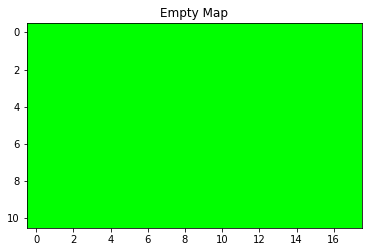

In [33]:
high_level_map = np.ones((11, 18))
visualize_map("Empty Map", high_level_map)

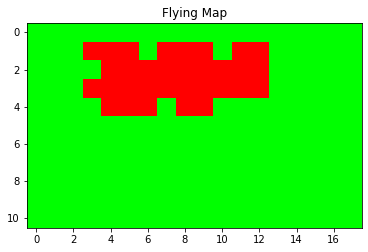

In [126]:
high_level_map[1, 3:6] = 0
high_level_map[1, 7:10] = 0
high_level_map[1, 11:13] = 0
high_level_map[2, 4:13] = 0
high_level_map[3, 3:13] = 0
high_level_map[4, 4:7] = 0
high_level_map[4, 8:10] = 0

visualize_map("Flying Map", high_level_map)

In [35]:
def vertex_of_cell(M, i, j):
    """Get the vertex of a cell

    Args:
        M (np.ndarray): the map we are working with.
        i (int): the row index.
        j (int): the column index.
    """
    assert len(M.shape) == 2
    m, n = M.shape
    # YOUR CODE HERE
    # ***** Start of your code *****
    vertex = (n*i)+j
    return vertex
    # ***** End of your code *****

In [242]:
def cell_of_vertex(M, k):
    """Get cell corresponding to the vertex.

    Args:
        M (np.ndarray): the map we are working with.
        i (int): the row index.
        j (int): the column index.
    """
    assert len(M.shape) == 2
    m, n = M.shape
    
    # YOUR CODE HERE
    # ***** Start of your code *****
    columns = k % n
    rows = k // n
    cell = np.array([rows, columns])
    return cell
    # ***** End of your code *****

In [42]:
def adjacency_matrix(M, flyable=1):
    """Visualize a 2D array using matplotlib.
    All inputs values should be normalized 0.0-1.0.

    Args:
        M (np.ndarray): the map we are working with.
        flyable (int): what number indicates a flyable cell; defauls to 1.
    """
    assert len(M.shape) == 2
    # Size of map
    m, n = M.shape
    
    # Number of vertices
    o = m * n
    
    # A for *A*djacency matrix
    A = np.zeros((o, o))
    
    # YOUR CODE HERE
    # ***** Start of your code *****
    for i in range(m):
        for j in range(n):
            vertex_number = vertex_of_cell(M, i, j)
            
            if M[i, j] == 1:
                
                if j != n-1 and M[i, j+1] == 1:
                    A[vertex_number, vertex_number+1] = 1
                    A[vertex_number+1, vertex_number] = 1
                    
                    
                if j != 0 and M[i, j-1] == 1:
                    A[vertex_number, vertex_number-1] = 1
                    A[vertex_number-1, vertex_number] = 1
                    
                if i != m-1 and M[i+1, j] == 1:
                    A[vertex_number, vertex_number+n] = 1
                    A[vertex_number+n, vertex_number] = 1
                    
                if i != 0 and M[i-1, j] == 1:
                    A[vertex_number, vertex_number-n] = 1
                    A[vertex_number-n, vertex_number] = 1
            
    # ***** End of your code *****
    
    return A    

In [140]:
la_adjacency = adjacency_matrix(high_level_map)
print(la_adjacency)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]


In [ ]:
def weighted_matrix(M, flyable = 1):
    """Visualize a 2D array using matplotlib.
    All inputs values should be normalized 0.0-1.0.

    Args:
        M (np.ndarray): the map we are working with.
        flyable (int): what number indicates a flyable cell; defauls to 1.
    """
    assert len(M.shape) == 2
    # Size of map
    m, n = M.shape
    
    # Number of vertices
    o = m * n
    
    # A for *A*djacency matrix
    A = np.zeros((o, o))
    
    # YOUR CODE HERE
    # ***** Start of your code *****
    for i in range(m):
        for j in range(n):
            vertex_number = vertex_of_cell(M, i, j)
            
            if M[i, j] == 1:
                
                if j != n-1 and M[i, j+1] == 1:
                    A[vertex_number, vertex_number+1] = 1
                    A[vertex_number+1, vertex_number] = 1
                    
                    
                if j != 0 and M[i, j-1] == 1:
                    A[vertex_number, vertex_number-1] = 1
                    A[vertex_number-1, vertex_number] = 1
                    
                if i != m-1 and M[i+1, j] == 1:
                    A[vertex_number, vertex_number+n] = 1
                    A[vertex_number+n, vertex_number] = 1
                    
                if i != 0 and M[i-1, j] == 1:
                    A[vertex_number, vertex_number-n] = 1
                    A[vertex_number-n, vertex_number] = 1
            
    # ***** End of your code *****
    
    return A

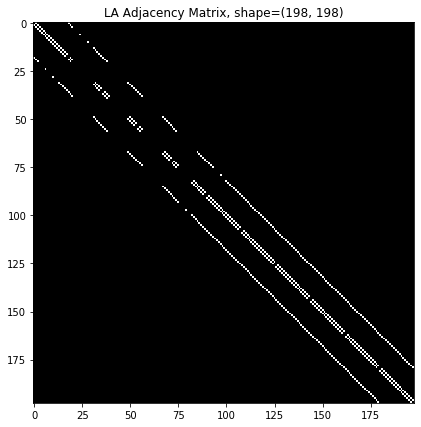

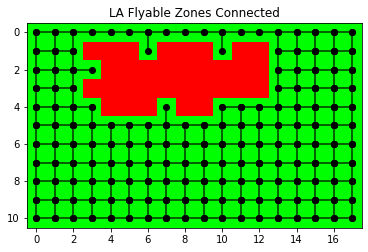

In [128]:
visualize_adjacency("LA Adjacency Matrix", la_adjacency)
visualize_map("LA Flyable Zones Connected", high_level_map, A=la_adjacency)

In [84]:
def neighbors(A, k):
    """Get the neighbors of vertex `k`
    
    Args:
        A (np.ndarray): Adjacency matrix
        i (int): vertex we care about.
    """
    assert len(A.shape) == 2
    
    # we have o vertices
    
    m, n = A.shape
    neighbors = set()
    # ***** Start of your code *****
    for i in range(m):
        for j in range(n):
            if A[i, j] == 1:
                if i == k:
                    neighbors.add(j)
                elif j == k:
                    neighbors.add(i)
    return list(neighbors)
    # ***** End of your code *****

In [63]:
def manhattan_distance(goal_cell, neighbor_point):
    y_goal = goal_cell[0]
    x_goal = goal_cell[1]
    y_neighbor = neighbor_point[0]
    x_neighbor = neighbor_point[1]
    distance_from_goal = abs(y_goal-y_neighbor) + abs(x_goal-x_neighbor)
    return distance_from_goal

In [111]:
def heuristic(graph, a, b):
    (x1, y1) = cell_of_vertex(graph, a)
    (x2, y2) = cell_of_vertex(graph, b)
    return abs(x1 - x2) + abs(y1 - y2)



In [291]:
#Referenced from https://www.algorithms-and-technologies.com/a_star/python
def a_star(graph, start, goal):
    """
    Finds the shortest distance between two nodes using the A-star (A*) algorithm
    :param graph: an adjacency-matrix-representation of the graph where (x,y) is the weight of the edge or 0 if there is no edge.
    :param heuristic: an estimation of distance from node x to y that is guaranteed to be lower than the actual distance. E.g. straight-line distance
    :param start: the node to start from.
    :param goal: the node we're searching for
    :return: The shortest distance to the goal node. Can be easily modified to return the path.
    """
    

    # This contains the distances from the start node to all other nodes, initialized with a distance of "Infinity"
    costs = [float("inf")] * len(graph)

    # The distance from the start node to itself is of course 0
    costs[start] = 0

    # This contains the priorities with which to visit the nodes, calculated using the heuristic.
    priorities = [float("inf")] * len(graph)

    # start node has a priority equal to straight line distance to goal. It will be the first to be expanded.
    
    priorities[start] = heuristic(graph, start, goal)
    # This contains whether a node was already visited
    visited = [False] * len(graph)

    # While there are nodes left to visit...
    while True:
        # ... find the node with the currently lowest priority...
        lowest_priority = float("inf")
        lowest_priority_index = -1
        for i in range(len(priorities)):
            # ... by going through all nodes that haven't been visited yet
            if priorities[i] < lowest_priority and not visited[i]:
                lowest_priority = priorities[i]
                lowest_priority_index = i

        if lowest_priority_index == -1:
            # There was no node not yet visited --> Node not found
            return -1

        elif lowest_priority_index == goal:
            
            # Goal node found
            
            
            return costs
    

        # ...then, for all neighboring nodes that haven't been visited yet....
        for i in range(len(graph[lowest_priority_index])):
            if graph[lowest_priority_index][i] != 0 and not visited[i]:
                # ...if the path over this edge is shorter...
                if costs[lowest_priority_index] + graph[lowest_priority_index][i] < costs[i]:
                    # ...save this path as new shortest path
                    costs[i] = costs[lowest_priority_index] + graph[lowest_priority_index][i]
                    # ...and set the priority with which we should continue with this node
                    
                    priorities[i] = costs[i] + heuristic(graph, i, goal)
                    

                # Lastly, note that we are finished with this node.
                visited[lowest_priority_index] = True
                

In [292]:
la_start_vertex = 156
la_end_vertex = 3
la_start_cell = [8, 12]
la_end_cell = [0, 3]

In [294]:

la_costs = a_star(
    la_adjacency,
    la_start_vertex,
    la_end_vertex,
)


In [260]:
import time
start_time = time.time()
for i in range(5000):
    la_costs = a_star(la_adjacency, la_start_vertex, la_end_vertex)
print("A* Runtime:", (time.time() - start_time), "seconds")

A* Runtime: 29.893584728240967 seconds


In [274]:
def shortest_neighbor(A, costs, k):
    """Find the neighbor to vertex `k` with the shortest distance.
    
    Args:
        A (np.ndarray): Adjacency matrix representing graph.
        costs (np.ndarray): costs to each vertex from some start node.
        k (int): vertex whose neighbors we should consider
    """
    # YOUR CODE HERE
    # ***** Start of your code *****
    best_neighbor = None
    shortest_cost = np.inf
    for neighbor in neighbors(A, k):
        if costs[neighbor] < shortest_cost:
            best_neighbor = neighbor
            shortest_cost = costs[neighbor]
    return best_neighbor
    # ***** End of your code *****

In [275]:
def shortest_path(A, costs, start, goal):
    """Find the shortest_path to goal from start. Costs are distances from start.
    
    Args:
        A (np.ndarray): Adjacency matrix representing graph.
        costs (np.ndarray): costs (distances) to each vertex from `start`.
        start (int): vertex to start at.
        goal (int): vertex to reach.
    """
    
    # YOUR CODE HERE
    # ***** Start of your code *****
    path = [goal]
    if goal == start:
        return path
    next_neighbor = shortest_neighbor(A, costs, goal)
    path.append(next_neighbor)
    while next_neighbor != start:
        next_neighbor = shortest_neighbor(A, costs, next_neighbor)
        path.append(next_neighbor)
    path.reverse()
    return path

In [276]:
la_path = shortest_path(
    la_adjacency, 
    la_costs, 
    la_start_vertex, 
    la_end_vertex,
)

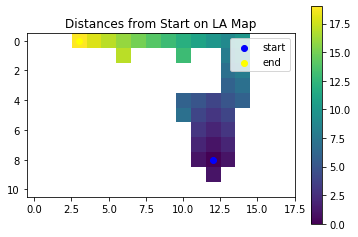

In [277]:
visualize_costs(
    "Distances from Start on LA Map", 
    high_level_map, 
    la_costs, 
    start=la_start_cell,
    end=la_end_cell,
)

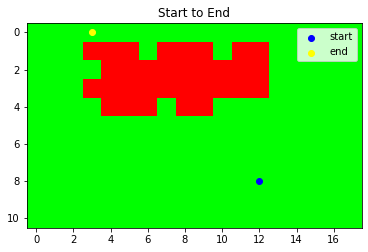

In [265]:
visualize_map("Start to End", high_level_map, start=la_start_cell, end=la_end_cell)

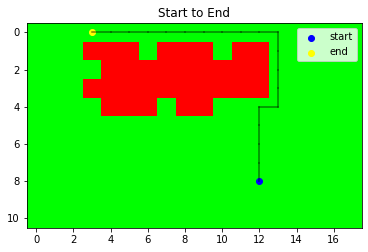

In [266]:
visualize_map("Start to End", high_level_map, start=la_start_cell, end= la_end_cell, path=la_path)

In [267]:
visualize_path(high_level_map, la_path)